# Lab -  5 Logistic Regression

#### Packages needed

<ol>
    <li> numpy </li>
    <li> matplotlib </li>
    <li> SKlearn </li>

</ol>

In this lab, we are going to perform classification of elements as 'FCC', 'BCC','HCP', given their elemental attributes. The attributes or input features to our model include atomic mass, electronegativity, ionic radius etc.

This lab is having 15 questions and is worth 30 points.

Detailed list of the input element attributes is provided below 

In [1]:
element_attributes = ["atomic_number", "atomic_volume", "boiling_point", "en_ghosh",  "evaporation_heat", "heat_of_formation",
                     "lattice_constant", "melting_point", "specific_heat","atomic_mass", "atomic_radius", 
                      "electrical_resistivity","molar_volume", "bulk_modulus", "youngs_modulus",
                     "average_ionic_radius", "density_of_solid", "coefficient_of_linear_thermal_expansion"]

The data for 47 element is provided in the file 'inputX.csv' and corresponding structure values are provided in 'origSt.csv'. Load the csv files into appropriate data variables

In [2]:
# import libraries
import numpy as np 
#import pandas as pd
inputX = np.loadtxt(open("inputX.csv", "rb"), delimiter=",")#pd.read_csv('inputX.csv')
outY = np.loadtxt(open("origSt.csv", "rb"),dtype='str',delimiter=",") #pd.read_csv('origSt.csv')

### Data visualization

Its always a good idea to get the sense of data distribution before running any Machine learning algorithm.

Ques 5.1 (1.5 marks) Compute mean,standard deviation, minimum and maximum of each feature in inputX. Print these quantities to see how features are varying in terms of these quantities

In [3]:
# Enter your code here
meanX = inputX.mean(axis = 0)
stdX = inputX.std(axis = 0)
minX = inputX.min(axis = 0)
maxX = inputX.max(axis = 0)

print("Mean", meanX)
print('std', stdX)
print('minX', minX)
print('maxX', maxX)


Mean [4.77021277e+01 1.61636170e+01 3.09652872e+03 1.65691845e-01
 3.51072340e+02 3.84488511e+02 3.81702128e+00 1.67153851e+03
 4.19893617e-01 1.14381436e+02 1.58510638e+00 3.06478723e-07
 1.60868085e+01 1.13617021e+02 1.30978723e+02 9.64540780e-01
 8.80259574e+03 1.89851064e-05]
std [2.39217829e+01 1.21666306e+01 1.36803222e+03 4.66761915e-02
 1.90787483e+02 2.04438972e+02 1.13255861e+00 8.06329844e+02
 5.54257074e-01 6.24201223e+01 2.88598022e-01 3.64019282e-07
 1.21597832e+01 9.85172354e+01 1.29978283e+02 2.46239215e-01
 5.49216186e+03 1.99080758e-05]
minX [3.0000e+00 5.0000e+00 9.5160e+02 9.3214e-02 5.9100e+01 7.6500e+01
 2.2900e+00 3.0160e+02 1.1300e-01 6.9410e+00 1.0500e+00 1.6300e-08
 4.8500e+00 1.6000e+00 1.7000e+00 5.9000e-01 5.3500e+02 4.5000e-06]
maxX [9.0000000e+01 7.0000000e+01 5.9300000e+03 2.6137000e-01 8.2400000e+02
 8.5100000e+02 8.8900000e+00 3.6800000e+03 3.4890000e+00 2.3203806e+02
 2.6000000e+00 1.4400000e-06 7.0940000e+01 3.8000000e+02 5.2800000e+02
 1.8100000e+00

Ques 5.2 (0.5 marks) Get the unique labels of output Y. Its a good idea to understand different labels we are dealing with

In [4]:
#Generate an array of strings that are unique in the output
np.unique(outY)

array(['bcc', 'fcc', 'hcp'], dtype='<U3')

### Normalization

Ques 5.3 ( 1 mark) Use the mean and standard deviation as computed in Ques 5.1 to get the normalized features

In [5]:
# normalize as usual
dt_norm = (inputX - meanX)/stdX

#check the work
print('Mean', dt_norm.mean(axis = 0))
#values are pretty close to zero

print('std', dt_norm.var(axis = 0))

Mean [ 6.14165929e-17  4.72435330e-16  3.44877791e-16  3.21256024e-16
 -7.55896527e-17  4.55900093e-16 -2.40351474e-16  6.73220345e-17
  4.08656560e-16  6.04717222e-16  1.99131491e-15 -7.08652994e-18
 -4.01570030e-16 -1.79525425e-16  8.03140060e-17 -4.29916150e-16
 -2.83461198e-17  2.57477255e-16]
std [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Ques 5.4 (1 mark) Check if there is any nan or infinity in your normalized features. Hint - Google numpy's isNan and isInf functions

In [6]:
#find the indicies where the values are NaN

np.argwhere(np.isnan(dt_norm))

array([], shape=(0, 2), dtype=int64)

Comment: no values of the input data array are Nan. Nice and clean data

### Train test split

Ques 5.5 (1 mark) Use SKlearn to divide the data into train and test set

In [7]:
#import dependecies
from sklearn.model_selection import train_test_split

#split data, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(dt_norm, outY, test_size = 0.2)


### Logistic regression

Ques 5.6 (2 marks) Use LogisticRegression class from SKLearn to fit model on training set. Using this class is very similar to Linear regression class we used in the last lab. More information can be found here https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [8]:
# import dependecies
from sklearn.linear_model import LogisticRegression

# define the model

clf = LogisticRegression(random_state = 0).fit(X_train, y_train)

Ques 5.7 (2 marks) Get the predictions on training set and compute mean classification error.

Classification error or misclassification happens when your model is predicting different label than the correct output. Mean classification error is average number of misclassification. You can approach this question by counting the number of times your ML model is predicting different than true label. Divide this number by your training or test set size and that will give you mean classification error.

In [9]:
#find y_predictions

y_pred = clf.predict(X_train)

#How many times does the model successfully or unsuccessfully predict the correct crystal structure?
correct_matches = np.sum(np.where(y_pred == y_train))
false_matches = np.sum(np.where(y_pred != y_train))

print('mean classification error: %0.2f' % (false_matches/(correct_matches + false_matches)))

mean classification error: 0.02


Ques 5.8 (1 mark) Get the predictions on test set and compute mean classification error on test set.

In [10]:
#find y_predictions

y_pred = clf.predict(X_test)

#How many times does the model successfully or unsuccessfully predict the correct crystal structure?
correct_matches = np.sum(np.where(y_pred == y_test))
false_matches = np.sum(np.where(y_pred != y_test))

print('mean classification error: %0.2f' % (false_matches/(correct_matches + false_matches)))

mean classification error: 0.42


Let's view the model that has been trained. Our model is linear and parametrized through weights of each feature. The values of these weights define our model. We can access the values of these coefficints through the following command

Ques 5.9 (1 mark) Print the coefficients of logistic regression. Hint :- Look into coef_ method of your classifier

In [11]:
clf.coef_

array([[-0.28265561,  0.33582239,  0.04462958, -0.22072336,  0.26444536,
         0.27379703,  0.75017954,  0.69100853,  0.07824355, -0.3010038 ,
         0.19106422,  0.1613959 ,  0.29176459,  0.10309627,  0.26969257,
         0.49292855, -0.29655331,  0.56946259],
       [ 0.09897025, -0.25668554, -0.18904618,  0.34067   , -0.14725402,
        -0.14810266,  0.92394232, -0.59276884,  0.00213467,  0.0796183 ,
        -0.33986679, -0.90657065, -0.21607867,  0.52802813, -0.31132302,
        -0.35591264,  0.2230237 , -0.22467284],
       [ 0.18368536, -0.07913685,  0.1444166 , -0.11994664, -0.11719134,
        -0.12569438, -1.67412186, -0.09823969, -0.08037822,  0.2213855 ,
         0.14880257,  0.74517475, -0.07568592, -0.63112441,  0.04163045,
        -0.13701591,  0.07352961, -0.34478975]])

What you see above is a matrix of dimension (number of classes , number of features). Under the hood, LogisticRegression is performing one versus all classification. Since we have three classes, we get three models corresponding to each row. When we use the above model for predictions, LogisticRegression fit three different models and provide the class label with highest score.

### Regularized logistic regression

Performing regularization in SKLearn is very easy. The LogisticRegression class has a parameter 'C' which defines the inverse penalty of regularization term. The default regularization is 'L2' i.e. we minimize the euclidean norm of the weights, equivalent to performing reglarization in linear regression. 

In this part of the lab, we will check the performance of logistic regression model as we vary C

##### Please report average misclassification error on both training and test set for all the questions below

Ques 5.10 (4 marks) - Fit a logistic regression model for C=0.1. Compute average number of correct predictions made on both training and test set. Also print the number of non-zero coefficients in your model. Hint :- numpy's count_nonzero function

In [12]:
values = [0.1, 10, 100]

for value in values:
    print('The value of C is: ' + str(value))
    
    # define the model

    clf = LogisticRegression(C = value).fit(X_train, y_train)

    # get predicitons
    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)


    #How many times does the model successfully or unsuccessfully predict the correct crystal structure?
    correct_matches = np.sum(np.where(y_train_predict == y_train))
    false_matches = np.sum(np.where(y_train_predict != y_train))

    print('mean classification error (train): %0.2f' % (false_matches/(correct_matches + false_matches)))

    #How many times does the model successfully or unsuccessfully predict the correct crystal structure?
    correct_matches = np.sum(np.where(y_test_predict == y_test))
    false_matches = np.sum(np.where(y_test_predict != y_test))

    print('mean classification error (test): %0.2f' % (false_matches/(correct_matches + false_matches)))

    print('Non-zero coefficients: %0.0f' %np.count_nonzero(clf.coef_))

The value of C is: 0.1
mean classification error (train): 0.09
mean classification error (test): 0.42
Non-zero coefficients: 54
The value of C is: 10
mean classification error (train): 0.02
mean classification error (test): 0.22
Non-zero coefficients: 54
The value of C is: 100
mean classification error (train): 0.00
mean classification error (test): 0.04
Non-zero coefficients: 54


Ques 5.11 (3 marks) - Fit a logistic regression model for C=10.0. Compute average number of correct predictions made on both training and test set. Also print the number of non-zero coefficients in your model.

See above

Ques 5.12 (3 marks) - Fit a logistic regression model for C=100. Compute average number of correct predictions made on both training and test set. Also print the number of non-zero coefficients in your model.

See above

### Feature selection through L-1 Norm/ Spare logistic regression

As mentioned in the last lab, one way to select features is to penalize the sum of absolute values of weights. This will result in sparse model, allowing you to select the features with non-zero weights. In this part of the lab we will train a sparse logistic regression model and assess its performance as compared to full model.

Train a sparse logistic regression model by setting penalty argument in LogisticRegression to L-1. Compute mean number of correct predictions with respect to different values of C. Also compute the number of non-zero weights.

Ques 5.13 (3 marks) - Fit a sparse logistic regression model for C=0.1. Compute average number of correct predictions made on both training and test set. Also compute the number of nonzero weights and compare them to the ones obtained in Ques 5.10.

In [13]:
values = [0.1, 10, 100]

for value in values:
    print('C value is ' + str(value))
    
    # define the model

    clf = LogisticRegression(C = value, solver = 'liblinear', penalty = 'l1').fit(X_train, y_train)

    # get predicitons
    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)


    #How many times does the model successfully or unsuccessfully predict the correct crystal structure?
    correct_matches = np.sum(np.where(y_train_predict == y_train))
    false_matches = np.sum(np.where(y_train_predict != y_train))

    print('mean classification error (train): %0.2f' % (false_matches/(correct_matches + false_matches)))

    #How many times does the model successfully or unsuccessfully predict the correct crystal structure?
    correct_matches = np.sum(np.where(y_test_predict == y_test))
    false_matches = np.sum(np.where(y_test_predict != y_test))

    print('mean classification error (test): %0.2f' % (false_matches/(correct_matches + false_matches)))

    print('Non-zero coefficients: %0.0f' %np.count_nonzero(clf.coef_))

C value is 0.1
mean classification error (train): 0.38
mean classification error (test): 0.64
Non-zero coefficients: 1
C value is 10
mean classification error (train): 0.02
mean classification error (test): 0.40
Non-zero coefficients: 25
C value is 100
mean classification error (train): 0.00
mean classification error (test): 0.20
Non-zero coefficients: 29


Ques 5.14 (3 marks) - Fit a sparse logistic regression model for C=10. Compute average number of correct predictions made on both training and test set. Also compute the number of nonzero weights and compare them to the ones obtained in Ques 5.11.

Please see above

Ques 5.15 (3 marks) - Fit a sparse logistic regression model for C=100. Compute average number of correct predictions made on both training and test set. Also compute the number of nonzero weights and compare them to the ones obtained in Ques 5.12.

Please see above

### Optional

Perform k-fold cross validation and check the performance in similar manner as above

Glmnet is another library to get sparse models. If you are interested, I highly recommend to go through their tutorials in python and try the logistic regression model on this dataset or other datasets of your choice. You can check the sparsity by comparing the non-zero weights of LogisticRegression models here with the ones obtained by Glmnet.

More information on Glmnet can be found here https://glmnet-python.readthedocs.io/en/latest/glmnet_vignette.html

If you are comfortable with classical ML methods, I will suggest to look into Bayesian linear regression models. Metacademy (developed by Prof. Roger Grosse at CS department) holds very useful ML related links. Please follow this link if you are feeling adventurous to switch to Bayesian regime https://metacademy.org/graphs/concepts/bayesian_logistic_regression

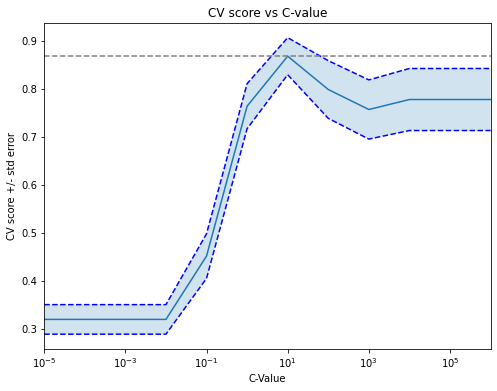

In [14]:
#Adapted From the Sklearn tutorial on k-fold cross valadtion and grid search
# https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

#Define model
Log_Reg = LogisticRegression(solver = 'liblinear', penalty = 'l1')

#specify parameters to search
Cs = np.geomspace(0.00001, 1000000, 12)
paramters = {'C': Cs}
n_folds = 12 # do ten-fold cross validation


#initialize grid search
clf = GridSearchCV(Log_Reg, paramters, cv = n_folds, refit = False)

#train model
clf.fit(dt_norm, outY) # use unsplit data

#extract scores from the model
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

#plottting
#------------------------------------------------------
plt.figure().set_size_inches(8, 6)
plt.semilogx(Cs, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(Cs, scores + std_error, 'b--')
plt.semilogx(Cs, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(Cs, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('C-Value')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([Cs[0], Cs[-1]])
plt.title('CV score vs C-value')


plt.show()